<h2> Personal Financial distress in the next two years</h2>

<h3>Data Source and data description</h3><br>
This dataset is originally posted on kaggle.com in 2011. It was collected from 150,000 borrowers who borrowed loans from banks in previous years. There are 11 variables and 150,000 observations in this dataset. The variables are defined as follows, <br><br>
<b>response Variable</b>
1. SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse (0 or 1) <br><br>
<b>Independent Variables</b>
2. RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (integer) <br>
3. Age - Age of borrower in years (integer) <br>
4. NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years (integer)<br>
5. DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income (percentage)<br>
6. MonthlyIncome - Monthly income (real) <br>
7. NumberOfOpenCreditLinesAndLoans - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (integer) <br>
8. NumberOfTimes90DaysLate - Number of times borrower has been 90 days or more past due (integer) <br>
9. NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit (integer)<br>
10. NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years (integer) <br>
11. NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.) (integer)<br><br>
where variables (2) to (11) are the independent variables, and variable (1) is the response variable. 

<b> The goal of the study was to find the variables and model that would most accurately predict whether a person would or would not experience financial distress in the next two years<br><br>
<h3> Models that were used in this study: </h3>
1. Gaussian Naive Bayes<br>
2. Logistic Regression <br>
3. Decision Tree <br>
4. (a) Ensemble Bagging (Decision Tree)<br>
(b) Ensemble Bagging (GNB)<br>
5. Ensemble Random Forest<br>
6. Knn <br>
7. SVM Gassian Kernel <br>
8. Ensemble Voting Machine<br>



In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
import json
from pprint import pprint
import StringIO
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer
#this module cannot be imported on a Mac, so model 8 Voting Classifier can only be reproduced on Windows or Linux
#from sklearn.ensemble import VotingClassifier  
import urllib
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from astropy.table import Table, Column

In [117]:
data = pd.read_csv('/Users/chungyanwan/Desktop/Fall 2015/Stat504/project/cs-training.csv')
data.head()

,,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


<b>Information about the data (some values are missing)</b>

In [118]:
print type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
                                        150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.9 MB


In [119]:
data.describe()

,,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6670.221237,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,14384.674215,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3008750.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [120]:
#drop any row that has missing values
data = data.dropna()
#drop the index column
data = data.drop(data.columns[0], axis=1)
data.shape

(120269, 11)

<b>Graphical visualizations of the data </b>

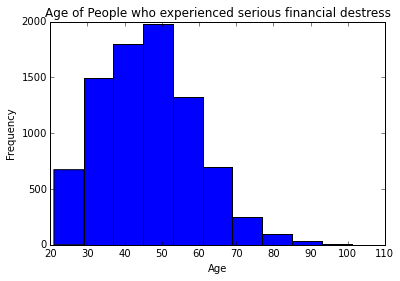

In [45]:
%matplotlib inline
plt.hist(data[data['SeriousDlqin2yrs'] ==1]['age'])
plt.title("Age of People who experienced serious financial destress")
plt.xlabel("Age")
plt.ylabel("Frequency")

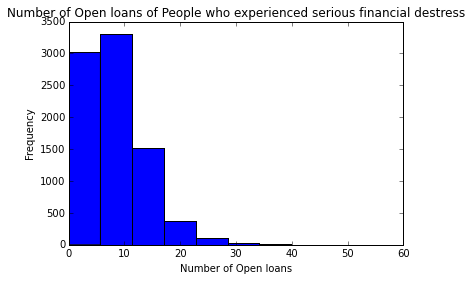

In [46]:
%matplotlib inline
plt.hist(data[data['SeriousDlqin2yrs'] ==1]['NumberOfOpenCreditLinesAndLoans'])
plt.title("Number of Open loans of People who experienced serious financial destress")
plt.xlabel("Number of Open loans")
plt.ylabel("Frequency")

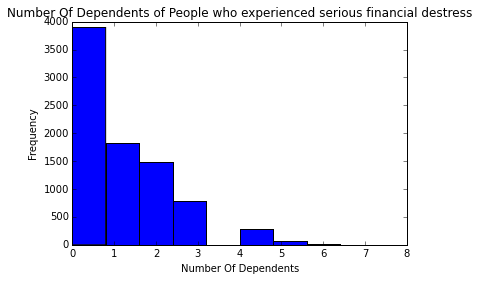

In [47]:
%matplotlib inline
plt.hist(data[data['SeriousDlqin2yrs'] ==1]['NumberOfDependents'])
plt.title("Number Of Dependents of People who experienced serious financial destress")
plt.xlabel("Number Of Dependents")
plt.ylabel("Frequency")
#plt.xlim([0.0, 3000.0])

<b> Set up subsets X and y, and split them into train and test<b>

In [48]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234567)

<h2>Null Model</h2>

In [49]:
#null model and its accuracy
distress_y = np.count_nonzero(y)
print 'Number of people who have financial distress: %d' %distress_y
# total observation is 120269, and distress_y = 8357, so the null model is all zeros. 
null_ypred = np.ones(120269)
null_score = 1 - 8357/120269.0
print ('Null model accuracy: %f' %null_score)
null_auc = metrics.roc_auc_score(y, null_ypred)
print ('Null model AUC: %f' %null_auc)

Number of people who have financial distress: 8357
Null model accuracy: 0.930514
Null model AUC: 0.500000


<h1>Part 1: Model Evaluation Using All Features</h1>

<h2>Model 1: Gaussian Naive Bayes</h2>

In [50]:
# 10-fold cross-validation for GaussianNB 
m1_start = time.time()
gnb = GaussianNB()
m1_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Gaussian NB average accracy: %f" %m1_scores.mean())
m1_auc = cross_val_score(gnb, X, y, cv=10, scoring='roc_auc')
print ("Gaussian NB average AUC: %f" %m1_auc.mean())
m1_end = time.time()
m1_time = m1_end - m1_start 
print ("Computation time (in second): %f"
      % m1_time)

Gaussian NB average accracy: 0.929466
Gaussian NB average AUC: 0.717931
Computational time (in second): 2.899693


<h2> Model 2: Logistcl Regression </h2>

In [51]:
#10-fold cross-validation for logreg
m2_start = time.time()
logreg = LogisticRegression(C=1e9)
m2_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average accracy: %f" %m2_scores.mean())
m2_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print ("Logistic regression average auc: %f" %m2_auc.mean())
m2_end = time.time()
m2_time = m2_end - m2_start 
print ("Computation time (in second): %f" % m2_time)

Logistic regression average accracy: 0.930805
Logistic regression average auc: 0.676303
Computational time (in second): 26.495750


<h2>Model 3: Decision Tree Classifier </h2>

<b>Parameter tunning: max_depth </b>

In [52]:
# search for an optimal value of max_depth for treeclf
tune1_start = time.time()
d_range = range(1,30)
d_scores = []
for d in d_range:
    treeclf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
tune1_end = time.time()
print "Computation time : %f" % (tune1_end - tune1_start)
print "Index of the best score:" 
np.where(d_scores == max(d_scores))

Computational time : 244.110826
Index of the best score:


(array([4]),)

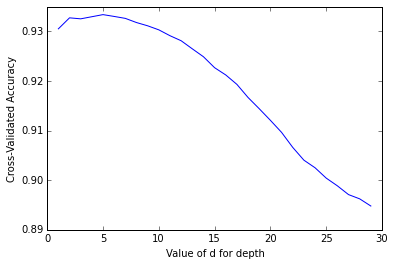

In [53]:
%matplotlib inline
# plot the value of d for treeclf (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of d for depth')
plt.ylabel('Cross-Validated Accuracy')

<b> Average accuracy and AUC </b>

In [54]:
# 10-fold cross-validation for Decision Tree with the optimal max depth (previously found max_depth=4)
m3_start = time.time()
treeclf = DecisionTreeClassifier(max_depth = 5)
m3_scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Decision Tree average accuracy: %f" % m3_scores.mean())
m3_auc = cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc')
print ("Decision Tree averageAUC: %f" % m3_auc.mean())
m3_end = time.time()
m3_time = m3_end - m3_start
print ("Computation time (in second): %f" % m3_time)

Decision Tree average accuracy: 0.933383
Decision Tree averageAUC: 0.831738
Computational time (in second): 7.638862


<h2> Model 4.1: Ensemble Bagging (use Decision Tree as the base estimator)</h2>

<b> Parameter tuning: n_estimator and max_samples </b>

In [81]:
# search for an optimal values of n_estimator and max_samples for bagging
tune4_start = time.time()
est_range = range(1,21)  
sam_range = range(100,2001,100)
tune4_scores = np.empty(shape=[20,20])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy')
        tune4_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
tune4_end = time.time()
print ("Computation time : %f" % (tune4_end - tune4_start))
print "Index of the best score: "
np.where(tune4_scores == tune4_scores.max())

Computational time : 1347.007179
Index of the best score: 


(array([19]), array([18]))

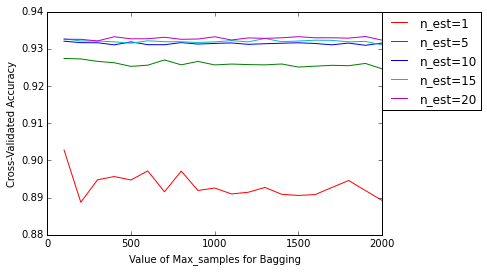

In [82]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, tune4_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, tune4_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, tune4_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, tune4_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, tune4_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Bagging')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Average accuracy and AUC </b>

In [84]:
# 10-fold cross-validation for Bagging using Decision Tree as the base estimator 
# previously found n_estimators=20, max_samples=1900
m4a_start = time.time()
bag = BaggingClassifier(n_estimators=20, max_samples=1900)
m4a_scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging average acurracy: %f" % m4a_scores.mean())
m4a_auc = cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
print ("Bagging average AUC: %f" % m4a_auc.mean())
m4a_end = time.time()
m4a_time = m4a_end - m4a_start
print ("Computation time (in second): %f" % m4a_time)

Bagging average acurracy: 0.932659
Bagging average AUC: 0.811993
Computation time (in second): 14.602276


<h2> Model 4.2: Ensemble Bagging (use Gaussian NB as the base estimator)</h2>

<b> Parameter tuning: n_estimator and max_samples  <span style="color:red">Error!!</span></b>

In [79]:
# search for an optimal values of n_estimator and max_samples for bagging using GNB as the base estimator 
# the accuracy didn't look right! All of them are about zero???!!!
tune4b_start = time.time()
gnb = GaussianNB()
est_range = range(1,21)  
sam_range = range(100,2001,100)
tune4b_scores = np.empty(shape=[20,20])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(base_estimator= gnb, n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy')
        tune4_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
tune4b_end = time.time()
print ("Computation time : %f" % (tune4b_end - tune4b_start))
print "Index of the best score: "
np.where(tune4b_scores == tune4b_scores.max())

Computational time : 565.843930
Index of the best score: 


(array([], dtype=int64), array([], dtype=int64))

In [80]:
tune4b_scores

array([[  0.00000000e+000,   0.00000000e+000,   1.52962724e-320,
                      nan,   4.96010633e+180,   1.67494825e+243,
          9.77824556e+199,   4.26137297e+257,   4.93080042e+151,
          7.72490541e+228,   2.04746498e+161,   3.68777421e+180,
          1.27422919e+161,   1.47715343e+248,   2.73061382e-153,
          4.72094421e+164,   9.78377888e+199,   6.85610327e-140,
          5.85097037e+170,   4.81440921e+199],
       [  5.95505350e+228,   1.59602216e-147,   1.33856861e-152,
          4.76660068e+180,   1.86681669e+280,   4.21509338e-149,
          1.17453851e+165,   2.92297214e-014,   9.65483556e+199,
          1.40060899e+166,   1.36052382e+248,   1.02262668e-259,
          1.69201560e+190,   1.69201539e+190,   9.39459006e-154,
          2.58304612e+161,   2.54834402e+161,   7.57881477e-096,
          1.39837537e-076,   1.17453851e+165],
       [  2.31462473e-152,   3.65093134e+233,   4.24819624e+180,
          7.71481296e+140,   1.31101780e-259,   2.44046000e-1

(0.8, 0.95)

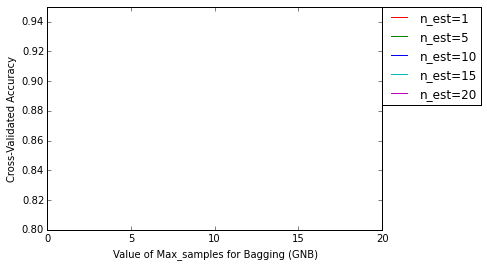

In [22]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, tune4b_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, tune4b_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, tune4b_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, tune4b_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, tune4b_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Bagging (GNB)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [85]:
# 10-fold cross-validation for Bagging using GNB as the base estimator 
m4b_start = time.time()
gnb = GaussianNB()
bag = BaggingClassifier(base_estimator=gnb, n_estimators=19, max_samples=19)
m4b_scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging (GNB) average acurracy: %f" % m4b_scores.mean())
m4b_auc = cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
print ("Bagging (GNB) average AUC: %f" % m4b_auc.mean())
m4b_end = time.time()
m4b_time = m4b_end - m4b_start
print ("Computation time (in second): %f" % m4b_time)

Bagging (GNB) average acurracy: 0.930514
Bagging (GNB) average AUC: 0.722136
Computation time (in second): 3.318390


<h3> Model 5: Ensemble Random Forest </h3>

<b>Parameter tuning: n_estimator and max_depth</b>

In [96]:
# search for an optimal values of n_estimator and max_depth for Random Forest Classifier 
tune5_start = time.time()
est_range = range(1,16)
dep_range = range(1,16)
tune5_scores = np.empty(shape=[15,15])
for est in est_range:
    for dep in dep_range:
        rfc = RandomForestClassifier(n_estimators=est, max_depth=dep)
        scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
        tune5_scores[est-1, dep-1] = scores.mean()
tune5_end = time.time()
print ("Computation time : %f" % (tune5_end - tune5_start))
print "Index of the best score: "
np.where(tune5_scores == tune5_scores.max())

Computational time : 2282.234968
Index of the best score: 


(array([13]), array([7]))

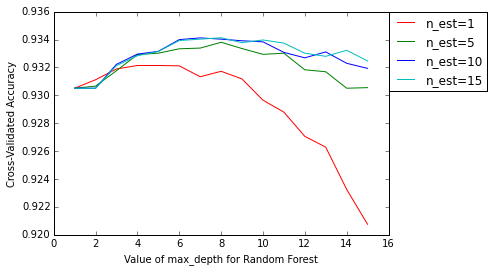

In [97]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(dep_range, tune5_scores[0,:],'r', label ='n_est=1')
plt.plot(dep_range, tune5_scores[4,:],'g',label = 'n_est=5')
plt.plot(dep_range, tune5_scores[9,:],'b',label = 'n_est=10')
plt.plot(dep_range, tune5_scores[14,:],'c', label ='n_est=15')
plt.xlabel('Value of max_depth for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b>Average accurarcy and AUC </b>

In [98]:
# 10-fold cross-validation for Bagging
# previously found best n_estimator = 14, max_sample = 8
m5_start = time.time()
bag = BaggingClassifier(n_estimators=14, max_samples=8, max_features=1.0)
m5_scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging average scores: %f" % m5_scores.mean())
m5_auc = cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
print ("Bagging AUC: %f" % m5_auc.mean())
m5_end = time.time()
m5_time = m5_end - m5_start
print ("Computation time (in second): %f" % m5_time)

Bagging average scores: 0.930514
Bagging AUC: 0.666655
Computation time (in second): 8.071021


<h3> Model 6: K Nearest Neighbor</h3>

<b>Parameter tuning: k </b>

In [99]:
# search for an optimal value of K for KNN
tune6_start = time.time()
k_range = range(1, 140)
tune6_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    tune6_scores.append(scores.mean())
tune6_end = time.time()
print ("Computation time: %f" % (tune6_end - tune6_start))
print "Index of the best score:"
np.where(tune6_scores == max(tune6_scores))

Computation time: 2493.534561
Index of the best score:


(array([24]),)

(array([24]),)

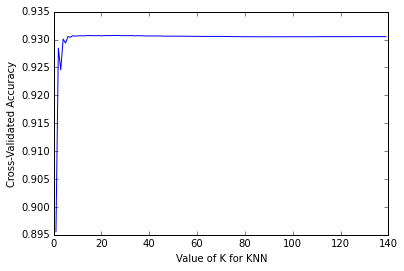

In [100]:
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, tune6_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
np.where(tune6_scores == max(tune6_scores))

<b>Average accurarcy and AUC </b>

In [101]:
#previously found optimal k = 25
m6_start = time.time()
knn = KNeighborsClassifier(n_neighbors=25)
m6_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Knn average accuracy: %f" %m6_scores.mean())
m6_auc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
print ("knn average AUC: %f" %m6_auc.mean())
m6_end = time.time()
m6_time = m6_end - m6_start 
print ("Computation time (in second): %f" % m6_time)

Knn average accuracy: 0.930722
knn average AUC: 0.609942
Computation time (in second): 37.716885


<h3> Model 7: SVM Gaussian Kernel </h3>

<b> Parameter tuning: Gamma

In [ ]:
#this tuning hasn't been computed, it should take a LONG time
tune7_start = time.time()
gamma_range = [.1,1,5,10]
tune7_scores = []
for g in gamma_range:
    svm_rbf = svm.SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svm_rbf, X, y, cv=10, scoring='accuracy')
    tune7_scores.append(scores.mean())
tune7_end = time.time()
print ("Computation time: %f"
      % tune7_end - tune7_start)

In [ ]:
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range, tune7_scores)
plt.xlabel('Value of gamma for SVM Gaussian')
plt.ylabel('Cross-Validated Accuracy')

<b>Average accurarcy and AUC </b>

In [ ]:
#10-fold cross-validation for SVM Gaussian
#I used the default parameter
m7_start = time.time()
svm_rbf = svm.SVC(kernel='rbf')
m7_scores = cross_val_score(svm_rbf, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("SVM Gaussian average accuracy: %f" %m7_scores.mean())
m7_auc = cross_val_score(svm_rbf, X, y, cv=10, scoring='roc_auc')
print ("SVM Gaussian average AUC: %f" %m7_auc.mean())
m7_end = time.time()
m7_time = m7_end - m7_start 
print ("Computation time (in second): %f" % m7_time)

<h2> Model 8: Ensemble Voting Classifier</h2>

<b>Average accurarcy and AUC</b>

In [8]:
m8_start = time.time()
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
m8_scores = cross_val_score(eclf, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Voting Classifier average scores: %f" % m8_scores.mean())
m8_auc = cross_val_score(eclf, X, y, cv=10, scoring='roc_auc')
print ("Voting Classifier AUC: %f" % m8_auc.mean())
m8_end = time.time()
m8_time = m8_end - m8_start
print ("Computation time (in second): %f" % m8_time)

Voting Classifier average scores: 0.930664
Voting Classifier AUC: 0.754522
Computational time (in second): 85.602000


<h2> Compare the AUC, Computation Time, and ROC </h3>

In [7]:
start1 = time.time()
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_y_pred_prob = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, gnb_thresholds = metrics.roc_curve(y_test, gnb_y_pred_prob)
print 'Gaussian Naive Bayes AUC: ', metrics.roc_auc_score(y_test, gnb_y_pred_prob)
end1 = time.time()
run1 = end1 - start1
print ("Computation time: %f" %run1 )

start2 = time.time()
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)
lr_y_pred_prob = logreg.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_y_pred_prob)
print 'Logistic Regression AUC: ', metrics.roc_auc_score(y_test, lr_y_pred_prob)
end2 = time.time()
run2 = end2 - start2
print ('Computation time: %f' %run2)

start3 = time.time()
treeclf = DecisionTreeClassifier(max_depth = 4)
treeclf.fit(X_train,y_train)
ct_y_pred_prob = treeclf.predict_proba(X_test)[:, 1]
ct_fpr, ct_tpr, ct_thresholds = metrics.roc_curve(y_test, ct_y_pred_prob)
print 'Decision Tree AUC: ', metrics.roc_auc_score(y_test, ct_y_pred_prob)
end3 = time.time()
run3 = end3 - start3
print ('Computation time: %f' %run3)

start4a = time.time()
bag = BaggingClassifier(n_estimators=19, max_samples=19)
bag.fit(X_train,y_train)
bag1_y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag1_fpr, bag1_tpr, bag1_thresholds = metrics.roc_curve(y_test, bag1_y_pred_prob)
print 'Bagging 1 AUC: ', metrics.roc_auc_score(y_test, bag1_y_pred_prob)
end4a = time.time()
run4a = end4a - start4a
print ('Computation time: %f' %run4a)

start4b = time.time()
gnb = GaussianNB()
bag2 = BaggingClassifier(base_estimator=gnb)
bag2.fit(X_train,y_train)
bag2_y_pred_prob = bag2.predict_proba(X_test)[:, 1]
bag2_fpr, bag2_tpr, bag2_thresholds = metrics.roc_curve(y_test, bag2_y_pred_prob)
print 'Bagging 2 AUC: ', metrics.roc_auc_score(y_test, bag2_y_pred_prob)
end4b = time.time()
run4b = end4b - start4b
print ('Computation time: %f' %run4b)

Gaussian Naive Bayes AUC:  0.716183181714
Computational time: 0.108000
Logistic Regression AUC:  0.636112690159
Computational time: 1.541000
Decision Tree AUC:  0.804537910471
Computational time: 0.299000
Bagging 1 AUC:  0.702322082049
Computational time: 0.413000
Bagging 2 AUC:  0.715067443105
Computational time: 0.760000


In [8]:
#error fixed
start5 = time.time()
rfc = RandomForestClassifier(n_estimators=8, max_depth=4)
rfc.fit(X_train,y_train)
rf_y_pred_prob = rfc.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_y_pred_prob)
print 'Random Forest AUC: ', metrics.roc_auc_score(y_test, rf_y_pred_prob)
end5 = time.time()
run5 = end5 - start5
print ('Computation time: %f' %run5)

start6 = time.time()
knn = KNeighborsClassifier(n_neighbors=135 )
knn.fit(X_train,y_train)
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_y_pred_prob)
print 'Knn AUC: ', metrics.roc_auc_score(y_test, knn_y_pred_prob)
end6 = time.time()
run6 = end6 - start6
print ('Computation time: %f' %run6)

start7 = time.time()
svm_rbf = svm.SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train,y_train)
svm2_y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1]
svm2_fpr, svm2_tpr, svm2_thresholds = metrics.roc_curve(y_test, svm2_y_pred_prob)
print 'SVM Gaussian Kernel AUC: ', metrics.roc_auc_score(y_test, svm2_y_pred_prob)
end7 = time.time()
run7 = end7 - start7
print ('Computation time: %f' %run7)

start8 = time.time()
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf.fit(X_train,y_train)
vc_y_pred_prob = eclf.predict_proba(X_test)[:, 1]
vc_fpr, vc_tpr, vc_thresholds = metrics.roc_curve(y_test, vc_y_pred_prob)
print 'Voting Classifier AUC: ', metrics.roc_auc_score(y_test, vc_y_pred_prob)
end8 = time.time()
run8 = end8 - start8
print ('Computation time: %f' %run8)

Random Forest AUC:  0.835988175163
Computational time: 0.554000
Knn AUC:  0.555355126775
Computational time: 3.579000
SVM Gaussian Kernel AUC:  0.501177391837
Computational time: 20375.881000


NameError: name 'clf1' is not defined

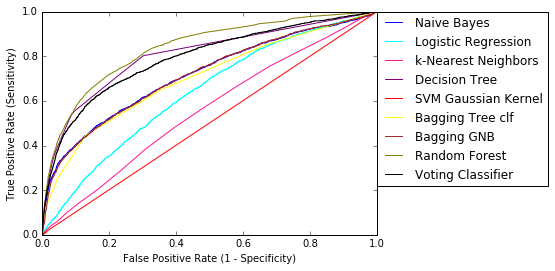

In [20]:
%matplotlib inline
plt.plot(gnb_fpr, gnb_tpr, 'blue', label ='Naive Bayes')
plt.plot(lr_fpr, lr_tpr, 'cyan', label ='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, 'deeppink', label ='k-Nearest Neighbors')
plt.plot(ct_fpr, ct_tpr, 'purple', label = 'Decision Tree')
plt.plot(svm2_fpr, svm2_tpr, 'red', label ='SVM Gaussian Kernel')
plt.plot(bag1_fpr, bag1_tpr, 'yellow', label ='Bagging Tree clf')
plt.plot(bag2_fpr, bag2_tpr, 'brown', label ='Bagging GNB')
plt.plot(rf_fpr, rf_tpr, 'olive', label ='Random Forest')
plt.plot(vc_fpr, vc_tpr, 'black' , label ='Voting Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> It looks like Random Forest has the greatest AUC! </b>

In [5]:
arr = np.array([['Null', 0.930514 ,0.5, '',''],
             ['Gaussian NB', 0.929450, 0.718049, 0.716183181714, 0.108000040054],
             ['Logistic Regression', 0.930622, 0.636503, 0.636112690159, 1.54099988937],
             ['Decision Tree', 0.932959, 0.815798, 0.804537910471, 0.299000024796],
             ['Bagging (Tree)', 0.930664, 0.753579, 0.702322082049, 0.413000106812],
             ['Bagging (GNB)', 0.929491, 0.716806,0.715067443105, 0.759999990463],
             ['Rondom Forest', 0.930514, 0.547731, 0.835988175163,0.554000139236],
             ['Knn', 0.930381, 0.505870, 0.555355126775, 3.57899999619],
             ['SVM Gaussian', 0.930514, 0.499413, 0.501177391837, 20375.881],
            ['Voting Classifier', 0.930664, 0.754522, 0.791764273171, 3.24900007248]])
t = Table(arr, names=('Model', 'CV Accuracy', 'CV AUC', 'AUC', 'Computation Time'))
print t

       Model        CV Accuracy  CV AUC       AUC       Computation Time
------------------- ----------- -------- -------------- ----------------
               Null    0.930514      0.5                                
        Gaussian NB     0.92945 0.718049 0.716183181714   0.108000040054
Logistic Regression    0.930622 0.636503 0.636112690159    1.54099988937
      Decision Tree    0.932959 0.815798 0.804537910471   0.299000024796
     Bagging (Tree)    0.930664 0.753579 0.702322082049   0.413000106812
      Bagging (GNB)    0.929491 0.716806 0.715067443105   0.759999990463
      Rondom Forest    0.930514 0.547731 0.835988175163   0.554000139236
                Knn    0.930381  0.50587 0.555355126775    3.57899999619
       SVM Gaussian    0.930514 0.499413 0.501177391837        20375.881
  Voting Classifier    0.930664 0.754522 0.791764273171    3.24900007248


<h1> Part2: Model Evaluation With feature selection </h2>
<h3> Select K best features </h3>
<b>Find the best value of K</b>

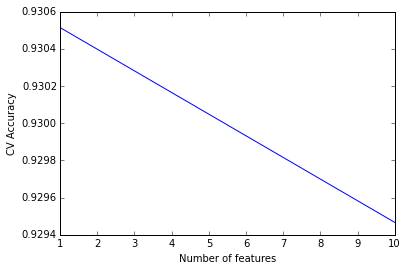

In [103]:
#find the best value of K with chi2
x_range = (1,10)
gnb = GaussianNB()
all_scores = []
for i in x_range:
    best_x = SelectKBest(chi2, k = i).fit_transform(X, y)
    scores = cross_val_score(gnb, best_x, y, cv = 10, scoring = 'accuracy')
    all_scores.append(scores.mean())
    
%matplotlib inline
plt.plot(x_range, all_scores)
plt.xlabel('Number of features')
plt.ylabel('CV Accuracy')

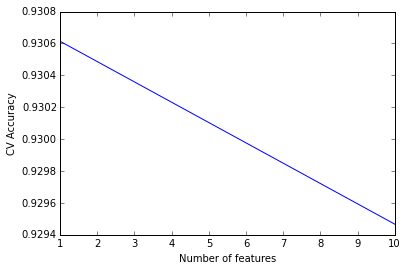

In [105]:
#find the best value of K with f_classif
x_range = (1,10)
gnb = GaussianNB()
all_scores = []
for i in x_range:
    best_x = SelectKBest(f_classif, k = i).fit_transform(X, y)
    scores = cross_val_score(gnb, best_x, y, cv = 10, scoring = 'accuracy')
    all_scores.append(scores.mean())
    
%matplotlib inline
plt.plot(x_range, all_scores)
plt.xlabel('Number of features')
plt.ylabel('CV Accuracy')

Both graphs suggest that using the least number of featues will yeild the best accuracy

In [107]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)

<h2> Model 1: Gaussian NB

In [113]:
# 10-fold cross-validation for GaussianNB 
m1_start = time.time()
gnb = GaussianNB()
m1_scores = cross_val_score(gnb, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Gaussian NB average accracy: %f" %m1_scores.mean())
m1_auc = cross_val_score(gnb, X_new, y, cv=10, scoring='roc_auc')
print ("Gaussian NB average AUC: %f" %m1_auc.mean())
m1_end = time.time()
m1_time = m1_end - m1_start 
print ("Computation time (in second): %f"
      % m1_time)

Gaussian NB average accracy: 0.930514
Gaussian NB average AUC: 0.528596
Computation time (in second): 1.037929


<h2> Model 2: Logistcl Regression </h2>

In [114]:
#10-fold cross-validation for logreg
m2_start = time.time()
logreg = LogisticRegression(C=1e9)
m2_scores = cross_val_score(logreg, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average accracy: %f" %m2_scores.mean())
m2_auc = cross_val_score(logreg, X_new, y, cv=10, scoring='roc_auc')
print ("Logistic regression average auc: %f" %m2_auc.mean())
m2_end = time.time()
m2_time = m2_end - m2_start 
print ("Computation time (in second): %f" % m2_time)

Logistic regression average accracy: 0.930514
Logistic regression average auc: 0.576061
Computation time (in second): 5.741642


<h2>Model 3: Decision Tree Classifier </h2>

In [110]:
# search for an optimal value of max_depth for treeclf
tune1_start = time.time()
d_range = range(1,30)
d_scores = []
for d in d_range:
    treeclf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(treeclf, X_new, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
tune1_end = time.time()
print "Computation time : %f" % (tune1_end - tune1_start)
print "Index of the best score:"
np.where(d_scores == max(d_scores))

Computational time : 73.539042
Index of the best score:


(array([0, 1, 2]),)

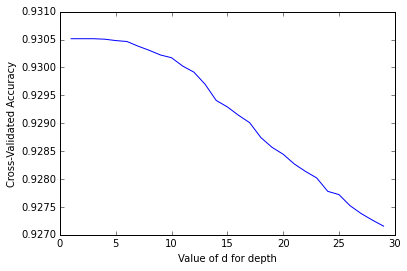

In [111]:
%matplotlib inline
# plot the value of d for treeclf (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of d for depth')
plt.ylabel('Cross-Validated Accuracy')

<b> Average accuracy and AUC </b>

In [115]:
# 10-fold cross-validation for Decision Tree with the optimal max depth (previously found max_depth=1,2,3)
m3_start = time.time()
treeclf = DecisionTreeClassifier(max_depth = 2)
m3_scores = cross_val_score(treeclf, X_new, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Decision Tree average accuracy: %f" % m3_scores.mean())
m3_auc = cross_val_score(treeclf, X_new, y, cv=10, scoring='roc_auc')
print ("Decision Tree averageAUC: %f" % m3_auc.mean())
m3_end = time.time()
m3_time = m3_end - m3_start
print ("Computation time (in second): %f" % m3_time)

Decision Tree average accuracy: 0.930514
Decision Tree averageAUC: 0.576133
Computation time (in second): 1.973863


In [17]:
arr = np.array([['Null', 0.930514 ,0.5, 0.930514 ,0.5],
             ['Gaussian NB', 0.929450, 0.718049, 0.930514, 0.528596],
             ['Logistic Regression', 0.930622, 0.636503, 0.930514, 0.576061],
             ['Decision Tree', 0.932959, 0.815798, 0.930514,0.587392]])
t = Table(arr, names=('Model', 'CV Accuracy', 'CV AUC', 'CV Accuracy2','CV AUC2'))
print t

       Model        CV Accuracy  CV AUC  CV Accuracy2 CV AUC2 
------------------- ----------- -------- ------------ --------
               Null    0.930514      0.5     0.930514      0.5
        Gaussian NB     0.92945 0.718049     0.930514 0.528596
Logistic Regression    0.930622 0.636503     0.930514 0.576061
      Decision Tree    0.932959 0.815798     0.930514 0.587392
